# Downloading Estimate Values

In [1]:
import NotebookImport
import DX_screen as DX

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd
from Imports import *

In [1]:
path = 'http://ibl.mdanderson.org/estimate/tables/'

In [84]:
df = pd.read_table(path + 'colorectal_adenocarcinoma_RNAseqV2.txt',
                   index_col=0)
df = FH.fix_barcode_columns(df.T).T

In [19]:
sig = pd.read_excel('/cellar/users/agross/stromal_immune.xlsx', skiprows=1,
                    index_col=0).T
sig = sig.ix[1:]

In [130]:
immune = sig['Immune141_UP']
immune = pd.Series(immune.index, immune)
immune = -1*immune + len(immune) + 1
immune = immune.ix[DX.rna_df.index].fillna(0)

In [204]:
r = pd.DataFrame({i: spearman_pandas(v, immune) for i,v in 
                  DX.rna_df.T.iterrows()}).T 
immune_score = r.rho

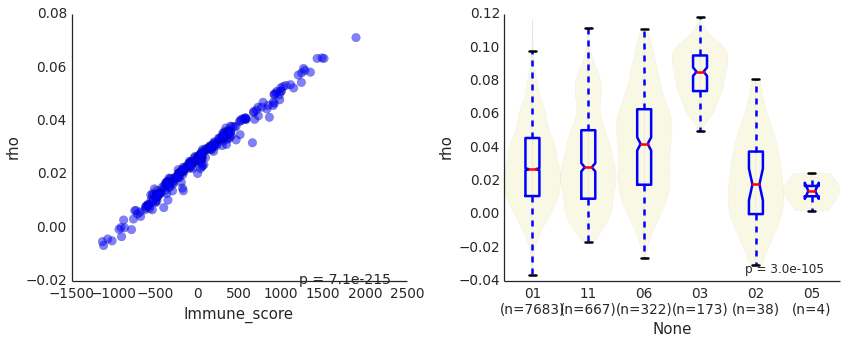

In [205]:
fig, axs = subplots(1,2, figsize=(12,5))
series_scatter(df.Immune_score, immune_score, ax=axs[0])
violin_plot_series(immune_score, ax=axs[1])
DX.sns.despine(fig)
fig.tight_layout()

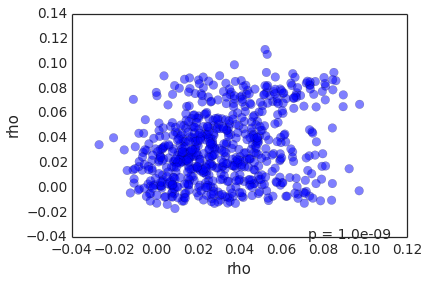

In [198]:
series_scatter(immune_score[:,'01'], immune_score[:,'11'])

In [187]:
stromal = sig['Stromal141_UP']
stromal = pd.Series(stromal.index, stromal)
stromal = -1*stromal + len(stromal) + 1
stromal = stromal.ix[DX.rna_df.index].fillna(0)

In [188]:
r = pd.DataFrame({i: spearman_pandas(v, stromal) for i,v in 
                  DX.rna_df.T.iterrows()}).T 
stromal_score = r.rho

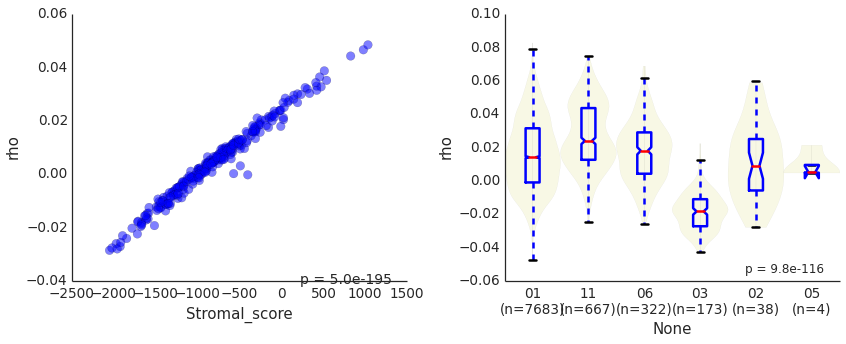

In [195]:
fig, axs = subplots(1,2, figsize=(12,5))
series_scatter(df.Stromal_score, stromal_score, ax=axs[0])
violin_plot_series(stromal_score, ax=axs[1])
DX.sns.despine(fig)
fig.tight_layout()

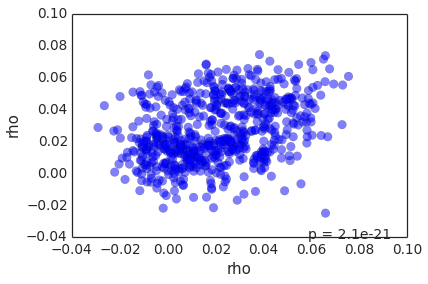

In [199]:
series_scatter(stromal_score[:,'01'], stromal_score[:,'11'])

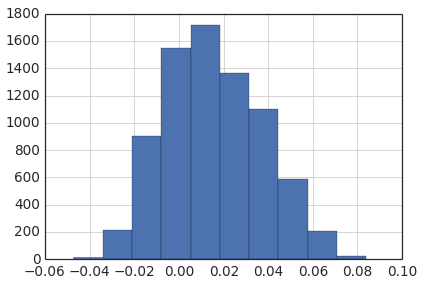

In [202]:
stromal_score[:, '01'].hist()

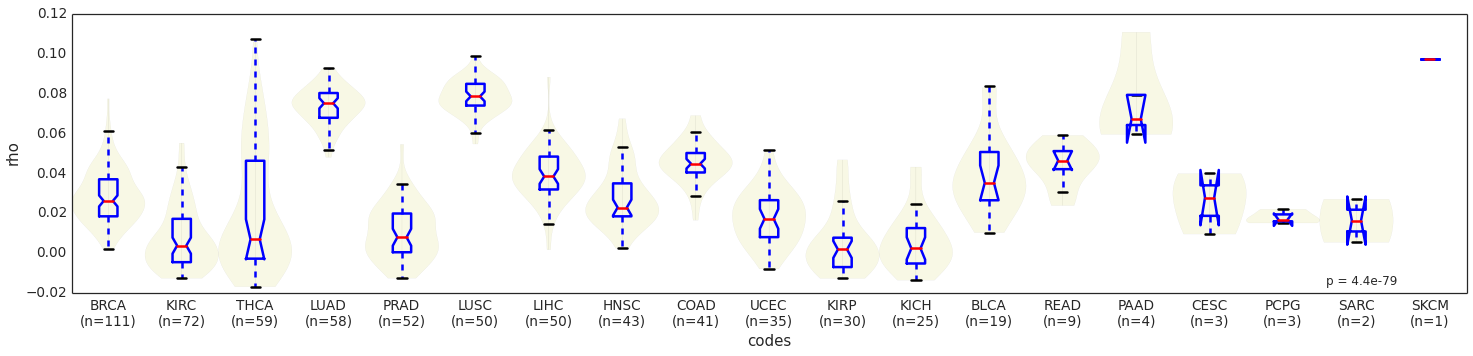

In [277]:
fig, ax = subplots(figsize=(25,5))
violin_plot_pandas(DX.codes, immune_score[:,'11'], ax=ax)

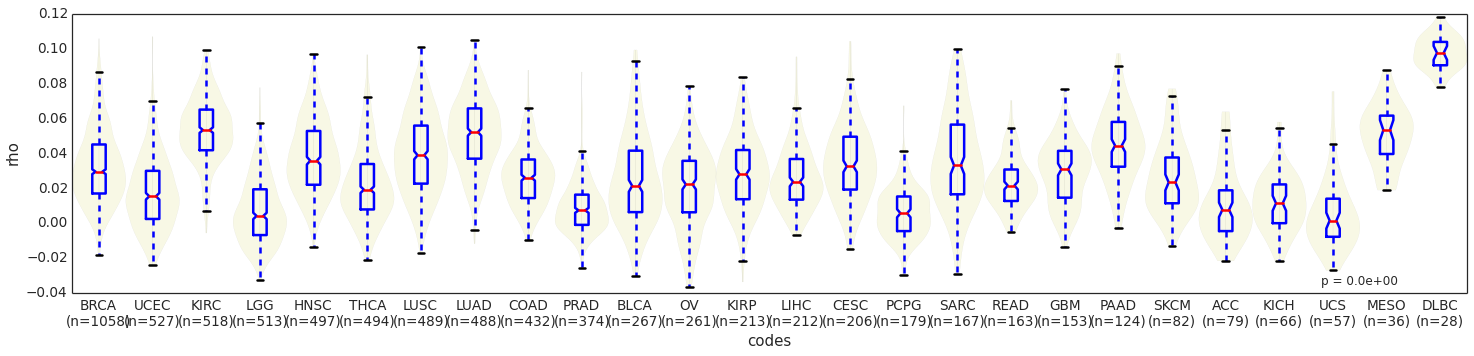

In [274]:
fig, ax = subplots(figsize=(25,5))
violin_plot_pandas(DX.codes, immune_score[:,'01'], ax=ax)

In [228]:
dx = matched_tn.xs('01',1,1) - matched_tn.xs('11',1,1)
rna_binary = dx > 0

In [216]:
r = pd.DataFrame({i: spearman_pandas(v, stromal) for i,v in 
                  dx.T.iterrows()}).T 
stromal_score_dx = r.rho

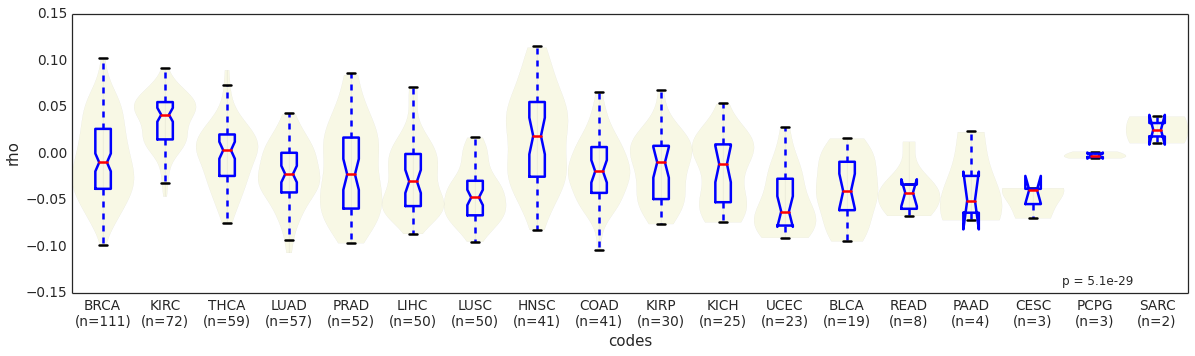

In [226]:
fig, ax = subplots(figsize=(20,5))
violin_plot_pandas(DX.codes, stromal_score_dx, ax=ax)

In [229]:
r = pd.DataFrame({i: spearman_pandas(v, immune) for i,v in 
                  dx.T.iterrows()}).T 
immune_score_dx = r.rho

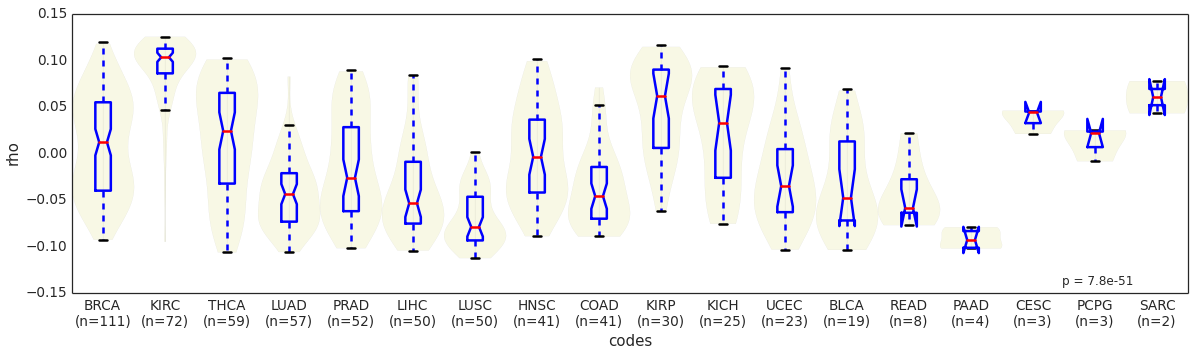

In [234]:
fig, ax = subplots(figsize=(20,5))
violin_plot_pandas(DX.codes, immune_score_dx, ax=ax)

In [243]:
rr = screen_feature(immune_score_dx.ix[ti(codes=='BRCA')], rev_kruskal, rna_binary,
                    align=False)

In [257]:
f2 = ti(rr.p.dropna() > .01)

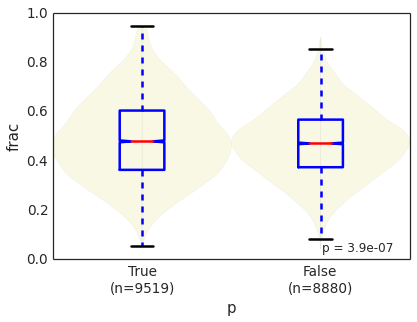

In [265]:
violin_plot_pandas(rr.p.dropna() > .1, DX.dx_rna.frac)

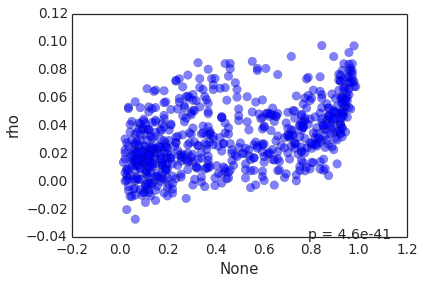

In [207]:
series_scatter(rna_binary.ix[ti(immune > 0)].mean(), immune_score[:,'01'])